In [1]:
import pandas as pd
import os
import requests
from config import pt_gkey
import gmaps
gmaps.configure(api_key=pt_gkey)

In [2]:
file_path = os.path.join("Resources","us-counties.csv")
df=pd.read_csv(file_path)

In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
df_new=df.dropna()

In [5]:
df_march=df_new[df_new['date']=='2020-03-11']

In [6]:
df_march.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths
1349,2020-03-11,King,Washington,53033.0,235,27
1290,2020-03-11,Westchester,New York,36119.0,120,0
1354,2020-03-11,Snohomish,Washington,53061.0,69,1
1180,2020-03-11,Santa Clara,California,6085.0,48,1
1255,2020-03-11,Middlesex,Massachusetts,25017.0,41,0
...,...,...,...,...,...,...
1242,2020-03-11,Johnson,Kansas,20091.0,1,0
1241,2020-03-11,Pottawattamie,Iowa,19155.0,1,0
1239,2020-03-11,St. Joseph,Indiana,18141.0,1,0
1238,2020-03-11,Noble,Indiana,18113.0,1,0


In [7]:
df_may=df_new[df_new['date']=='2020-05-06']

In [8]:
df_may.reset_index(drop=True,inplace=True)

In [9]:
df_may.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths
569,2020-05-06,Cook,Illinois,17031.0,46689,2004
1682,2020-05-06,Nassau,New York,36059.0,37350,2325
1701,2020-05-06,Suffolk,New York,36103.0,35543,1574
1709,2020-05-06,Westchester,New York,36119.0,30426,1285
186,2020-05-06,Los Angeles,California,6037.0,28644,1367
...,...,...,...,...,...,...
2252,2020-05-06,Hand,South Dakota,46059.0,1,0
994,2020-05-06,Metcalfe,Kentucky,21169.0,1,0
997,2020-05-06,Morgan,Kentucky,21175.0,1,0
1000,2020-05-06,Nicholas,Kentucky,21181.0,1,0


In [10]:
dd=df_may[['fips','cases']]

In [11]:
dd

,fips,cases
0,1001.0,58
1,1003.0,196
2,1005.0,47
3,1007.0,43
4,1009.0,42
...,...,...
2935,56035.0,3
2936,56037.0,19
2937,56039.0,98
2938,56041.0,8


In [12]:
gg=df_may.groupby(['fips'])

In [13]:
df_new_date=df_new[df_new['date']=='2020-09-08']

In [14]:
df_new_date.reset_index(inplace=True,drop=True)

In [15]:
df_new_date.head()

,date,county,state,fips,cases,deaths
0,2020-09-08,Autauga,Alabama,1001.0,1508,24
1,2020-09-08,Baldwin,Alabama,1003.0,4757,46
2,2020-09-08,Barbour,Alabama,1005.0,778,7
3,2020-09-08,Bibb,Alabama,1007.0,589,9
4,2020-09-08,Blount,Alabama,1009.0,1390,12


In [16]:
merged=pd.merge(df_new_date,dd,on='fips')

In [17]:
merged['rate']=(merged['cases_x']-merged['cases_y'])/merged['cases_y']

In [18]:
rate_df=merged.sort_values(['rate'],ascending=False)

In [19]:
rate_df.reset_index(drop=True,inplace=True)

In [20]:
rate_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate
0,2020-09-08,Gulf,Florida,12045.0,846,13,1,845.000000
1,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000
2,2020-09-08,Taylor,Florida,12123.0,1231,10,3,409.333333
3,2020-09-08,Polk,Missouri,29167.0,407,1,1,406.000000
4,2020-09-08,Lafayette,Florida,12067.0,1213,10,3,403.333333


In [ ]:
#df.groupby(df['date'].dt.strftime('%B'))['Revenue'].sum().sort_values()

In [67]:
rate_df['date']=pd.to_datetime(rate_df['date'])

In [69]:
rate_df.groupby(rate_df['date'].dt.strftime('%B'))['cases_x'].sum()

date
September    6062956
Name: cases_x, dtype: int64

## Census Information

In [10]:
# Notes / comments from Tobias

# Please note that some 2019 Data for the ACS will be released on September 17th or later. Details found at the following: 
# https://www.census.gov/programs-surveys/acs/news/data-releases/2019/release-schedule.html

# Instead will get the 2014—2018 ACS 5-Year Narrative Profile. Snapshot / overview is at the following:     
# https://www.census.gov/acs/www/data/data-tables-and-tools/narrative-profiles/2018/report.php?geotype=nation&usVal=us

# Within this snapsot is education, employer type / industry,  occupation, how they commute to work,income, 
# population by age and sex, and type of housing (single family vs apartments / multi-unit). 

# Reference class example from Session 6.3 Geocoding on Census. 

In [11]:
# Python Wrapper for Census API 
from census import Census
import requests

In [12]:
# Census API Key
from config import api_key

ImportError: cannot import name 'api_key' from 'config' (C:\Rice Project-1\Repository\Rice-Project-1-G11\config.py)

In [ ]:
# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

In [ ]:
# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [ ]:
# query for ACS tables
tables = c.acs5.tables()

In [ ]:
table_df=pd.DataFrame(tables)
table_df.head(50)

### Total Population

In [ ]:
# B01003 TOTAL POPULATION

table_id ='B01003'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

### Population by Gender

In [ ]:
# B98012 TOTAL POPULATION COVERAGE RATE BY SEX

table_id ='B98012'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

### Transportation to Work

In [ ]:
# B08301 MEANS OF TRANSPORTATION TO WORK

table_id ='B08301'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(50)

### Select the Fields of Interest

In [ ]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B98012_001E", "B98012_002E", "B08301_003E", "B08301_011E", 
                          "B08301_021E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

### Create DataFrame

In [ ]:
# Create DataFrame

census_dataframe = pd.DataFrame(census_data)

# Format and update DataFrame
census_dataframe = census_dataframe.rename(columns={"B01003_001E": "Population",
                                                       "B98012_001E": "Population II",
                                                       "B98012_002E": "Male Population",
                                                       "B98012_003E": "Female Population",
                                                       "B08301_003E": "Drive to Work - Solo Driver", 
                                                       "B08301_011E": "Public Transportation",
                                                       "B08301_021E": "Work from Home", 
                                                       "NAME": "Name", 
                                                       "zip code tabulation area": "Zipcode"
                                                      })

census_dataframe.head()

In [82]:

location= os.path.join('cases-lat-lng.csv')
df_latlng=pd.read_csv(location)


In [83]:
df_latlng.head()

,date,county,state,fips,cases,deaths,Latitude,Longitude
0,2020-09-08,Autauga,Alabama,1001.0,1508,24,32.579182,-86.499655
1,2020-09-08,Baldwin,Alabama,1003.0,4757,46,30.601074,-87.776333
2,2020-09-08,Barbour,Alabama,1005.0,778,7,31.817290,-85.354965
3,2020-09-08,Bibb,Alabama,1007.0,589,9,32.956280,-87.142289
4,2020-09-08,Blount,Alabama,1009.0,1390,12,34.014515,-86.499655


In [84]:
df_latlng=df_latlng.drop(['deaths'],axis=1)

In [85]:
df_latlng.head()

,date,county,state,fips,cases,Latitude,Longitude
0,2020-09-08,Autauga,Alabama,1001.0,1508,32.579182,-86.499655
1,2020-09-08,Baldwin,Alabama,1003.0,4757,30.601074,-87.776333
2,2020-09-08,Barbour,Alabama,1005.0,778,31.817290,-85.354965
3,2020-09-08,Bibb,Alabama,1007.0,589,32.956280,-87.142289
4,2020-09-08,Blount,Alabama,1009.0,1390,34.014515,-86.499655


In [25]:
place =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(place)

In [26]:
df_fp.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [27]:
fp=df_fp.groupby('STCOUNTYFP')

In [28]:
fp

In [29]:
place=os.path.join('Resources','census_dataframe.csv')
cen_df=pd.read_csv(place)

In [30]:
cen_df.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zipcode
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303


In [31]:
data=cen_df[['Population','Zipcode']]

In [32]:
data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [33]:
data_df.head()

,Population,ZIP
0,8642,43964
1,51116,28216
2,71605,28277
3,27286,28278
4,29414,28303


In [34]:
zf=zipfp=pd.merge(data_df,df_fp,on='ZIP')

In [35]:
zf.head()

,Population,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,37051,Fayetteville,NC,Cumberland County,H1


In [36]:
zipfp=zipfp.rename({'STCOUNTYFP':'fips'},axis=1)

In [37]:
g=zipfp.groupby('fips')['Population'].sum()

In [38]:
ss=pd.merge(df_latlng,g,on='fips')

In [39]:
ss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,2020-09-08,Autauga,Alabama,1001.0,1508,32.579182,-86.499655,105345
1,2020-09-08,Baldwin,Alabama,1003.0,4757,30.601074,-87.776333,227450
2,2020-09-08,Barbour,Alabama,1005.0,778,31.817290,-85.354965,30474
3,2020-09-08,Bibb,Alabama,1007.0,589,32.956280,-87.142289,84537
4,2020-09-08,Blount,Alabama,1009.0,1390,34.014515,-86.499655,157623


In [40]:
resetss=ss.sort_values('Population',ascending=False)

In [41]:
resetss.reset_index(inplace=True,drop=True)

In [42]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,2020-09-08,Los Angeles,California,6037.0,249241,34.052234,-118.243685,10590304
1,2020-09-08,Cook,Illinois,17031.0,132079,41.737659,-87.697554,5671859
2,2020-09-08,Harris,Texas,48201.0,112039,29.775182,-95.310250,5047263
3,2020-09-08,Maricopa,Arizona,4013.0,136040,33.058106,-112.047642,4387308
4,2020-09-08,San Diego,California,6073.0,41140,32.715738,-117.161084,3419051


In [92]:
resetss['Positivity_Rate']=(resetss['cases'])/(resetss['Population']/100000)

In [93]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population,Positivity_Rate
0,2020-09-08,Los Angeles,California,6037.0,249241,34.052234,-118.243685,10590304,2353.482960
1,2020-09-08,Cook,Illinois,17031.0,132079,41.737659,-87.697554,5671859,2328.672134
2,2020-09-08,Harris,Texas,48201.0,112039,29.775182,-95.310250,5047263,2219.797146
3,2020-09-08,Maricopa,Arizona,4013.0,136040,33.058106,-112.047642,4387308,3100.762472
4,2020-09-08,San Diego,California,6073.0,41140,32.715738,-117.161084,3419051,1203.257863


In [94]:
resetss['Positivity_Rate']=resetss['Positivity_Rate'].map("{:.0f}".format)

In [95]:
resetss['Positivity_Rate']=pd.to_numeric(resetss['Positivity_Rate'])

In [96]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population,Positivity_Rate
0,2020-09-08,Los Angeles,California,6037.0,249241,34.052234,-118.243685,10590304,2353
1,2020-09-08,Cook,Illinois,17031.0,132079,41.737659,-87.697554,5671859,2329
2,2020-09-08,Harris,Texas,48201.0,112039,29.775182,-95.310250,5047263,2220
3,2020-09-08,Maricopa,Arizona,4013.0,136040,33.058106,-112.047642,4387308,3101
4,2020-09-08,San Diego,California,6073.0,41140,32.715738,-117.161084,3419051,1203


In [ ]:
resetss=resetss.sort_values((['Positivity_Rate']),ascending=False)

In [ ]:
resetss.reset_index(inplace=True,drop=True)

In [45]:
gg=resetss[['fips','Population']]

In [46]:
rate_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate
0,2020-09-08,Gulf,Florida,12045.0,846,13,1,845.000000
1,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000
2,2020-09-08,Taylor,Florida,12123.0,1231,10,3,409.333333
3,2020-09-08,Polk,Missouri,29167.0,407,1,1,406.000000
4,2020-09-08,Lafayette,Florida,12067.0,1213,10,3,403.333333


In [47]:
k100=pd.merge(rate_df,gg,on='fips')

In [48]:
k100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,2020-09-08,Gulf,Florida,12045.0,846,13,1,845.000000,16616
1,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000,144905
2,2020-09-08,Taylor,Florida,12123.0,1231,10,3,409.333333,27363
3,2020-09-08,Polk,Missouri,29167.0,407,1,1,406.000000,64600
4,2020-09-08,Lafayette,Florida,12067.0,1213,10,3,403.333333,12202


In [49]:
k100=k100[k100['Population']>100000]

In [50]:
#dataframe sorted by rate for population over 100k
k100.sort_values(['rate'],ascending=False)

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
1,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000,144905
11,2020-09-08,Madison,Arkansas,5087.0,310,2,1,309.000000,102420
29,2020-09-08,Sebastian,Arkansas,5131.0,3042,38,14,216.285714,142299
36,2020-09-08,Meade,South Dakota,46093.0,346,1,2,172.000000,118642
41,2020-09-08,Bingham,Idaho,16011.0,676,9,4,168.000000,121264
...,...,...,...,...,...,...,...,...,...
2925,2020-09-08,Hudson,New Jersey,34017.0,20453,1512,16197,0.262765,684355
2926,2020-09-08,Orange,New York,36071.0,11550,410,9215,0.253391,416758
2928,2020-09-08,Westchester,New York,36119.0,37313,1452,30426,0.226352,1146948
2930,2020-09-08,Nassau,New York,36059.0,45294,2199,37350,0.212691,1402577


In [51]:
k100.reset_index(drop=True,inplace=True)

In [52]:
k100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000,144905
1,2020-09-08,Madison,Arkansas,5087.0,310,2,1,309.000000,102420
2,2020-09-08,Sebastian,Arkansas,5131.0,3042,38,14,216.285714,142299
3,2020-09-08,Meade,South Dakota,46093.0,346,1,2,172.000000,118642
4,2020-09-08,Bingham,Idaho,16011.0,676,9,4,168.000000,121264


In [65]:
import matplotlib.pyplot as plt
import scipy.stats as sts

(0.0, 1000.0)

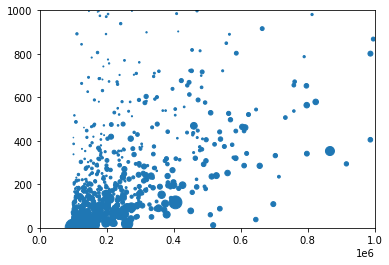

In [81]:
plt.scatter(k100['Population'],k100['cases_y'],s=k100['rate'])
plt.xlim(0,1000000)
plt.ylim(0,1000)

In [73]:
corr= sts.pearsonr(k100['Population'],k100['cases_y'])

In [74]:
corr

(0.6093405483034505, 1.1783643952513249e-99)

In [53]:
ktop100=k100.head(100)

In [86]:
df_latlng.head()

,date,county,state,fips,cases,Latitude,Longitude
0,2020-09-08,Autauga,Alabama,1001.0,1508,32.579182,-86.499655
1,2020-09-08,Baldwin,Alabama,1003.0,4757,30.601074,-87.776333
2,2020-09-08,Barbour,Alabama,1005.0,778,31.817290,-85.354965
3,2020-09-08,Bibb,Alabama,1007.0,589,32.956280,-87.142289
4,2020-09-08,Blount,Alabama,1009.0,1390,34.014515,-86.499655


In [89]:
df_sub=df_latlng[['fips','Latitude','Longitude']]

In [91]:
type(df_sub)

pandas.core.frame.DataFrame

In [54]:
ktop100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000,144905
1,2020-09-08,Madison,Arkansas,5087.0,310,2,1,309.000000,102420
2,2020-09-08,Sebastian,Arkansas,5131.0,3042,38,14,216.285714,142299
3,2020-09-08,Meade,South Dakota,46093.0,346,1,2,172.000000,118642
4,2020-09-08,Bingham,Idaho,16011.0,676,9,4,168.000000,121264


In [92]:
ktop100=pd.merge(ktop100,df_sub,on='fips')

In [93]:
ktop100.shape

(100, 11)

In [94]:
ktop100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population,Latitude,Longitude
0,2020-09-08,Tehama,California,6103.0,453,1,1,452.000000,144905,40.027102,-122.123323
1,2020-09-08,Madison,Arkansas,5087.0,310,2,1,309.000000,102420,35.013147,-90.722610
2,2020-09-08,Sebastian,Arkansas,5131.0,3042,38,14,216.285714,142299,35.226040,-94.315422
3,2020-09-08,Meade,South Dakota,46093.0,346,1,2,172.000000,118642,44.441519,-102.685507
4,2020-09-08,Bingham,Idaho,16011.0,676,9,4,168.000000,121264,43.211230,-112.362415


In [56]:
output=os.path.join('Resources','ktop100.csv')
ktop100.to_csv(output,index=False,header=True)

In [ ]:
 top5=resetss.head()

In [ ]:
top5

In [ ]:
pt_locations =top5[['Latitude','Longitude']]
pt_cases=top5['Positivity_Rate'].astype(float)
pt_maxx=top5['Positivity_Rate'].max()


In [ ]:
fig=gmaps.figure()
heat_layer=gmaps.heatmap_layer(pt_locations,weights=pt_cases,dissipating=False,max_intensity=pt_maxx,point_radius=0.9)

In [ ]:
fig.add_layer(heat_layer)

In [ ]:
fig

In [ ]:
info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>State</dt><dd>{state}</dd>
<dt>Cases</dt><dd>{Positivity_Rate}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in top5.iterrows()]
locations = top5[["Latitude","Longitude"]]


In [ ]:
marker_layer=gmaps.marker_layer(locations,info_box_content=covid_info)
fig.add_layer(marker_layer)

In [ ]:
fig